In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

## Create data from Sklearn

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples = 200, n_features = 2, random_state = 42)

In [4]:
data = data[0]

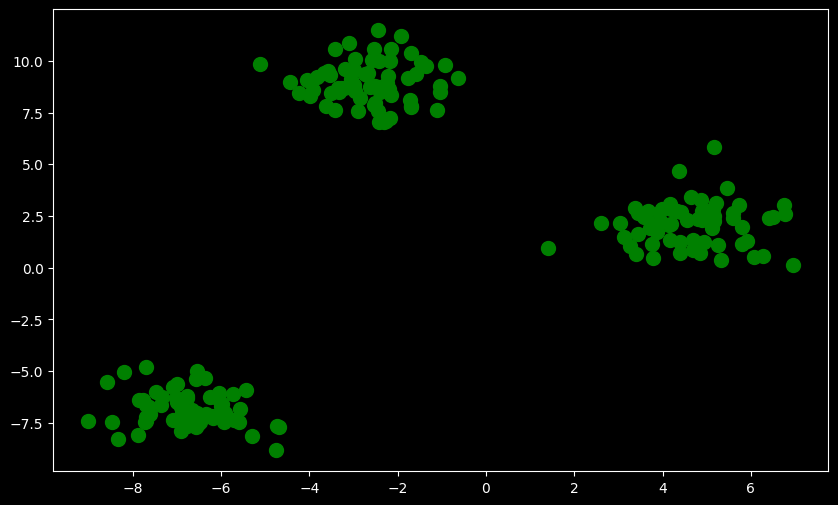

In [5]:
plt.figure(figsize = (10,6))
plt.scatter(data[:, 0], data[:, 1], c = 'g', s = 100)

In [6]:
data2 = np.array([[0.4, 1],[0.2,0.5]])

In [7]:
data2

array([[0.4, 1. ],
       [0.2, 0.5]])

In [8]:
X = np.dot(data, data2)

In [9]:
X.shape

(200, 2)

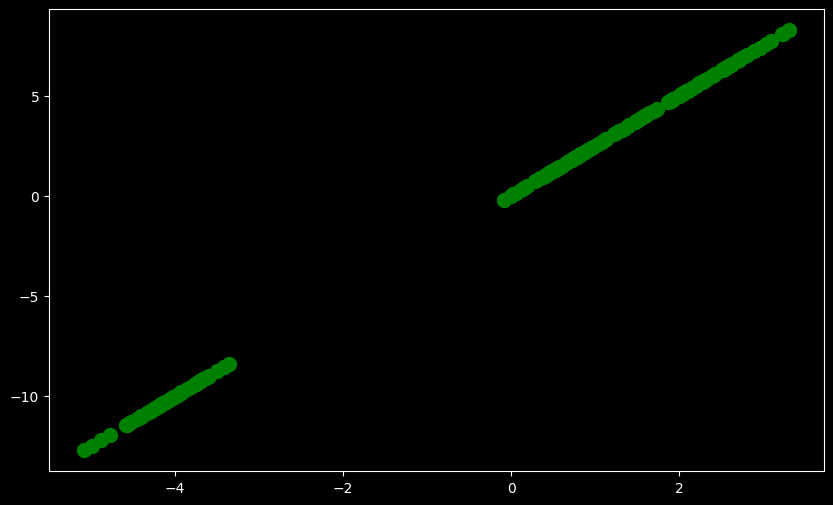

In [10]:
plt.figure(figsize = (10,6))
plt.scatter(X[:, 0], X[:, 1], c = 'g', s = 100)

## Using Elbow method to find the optimal number of clusters

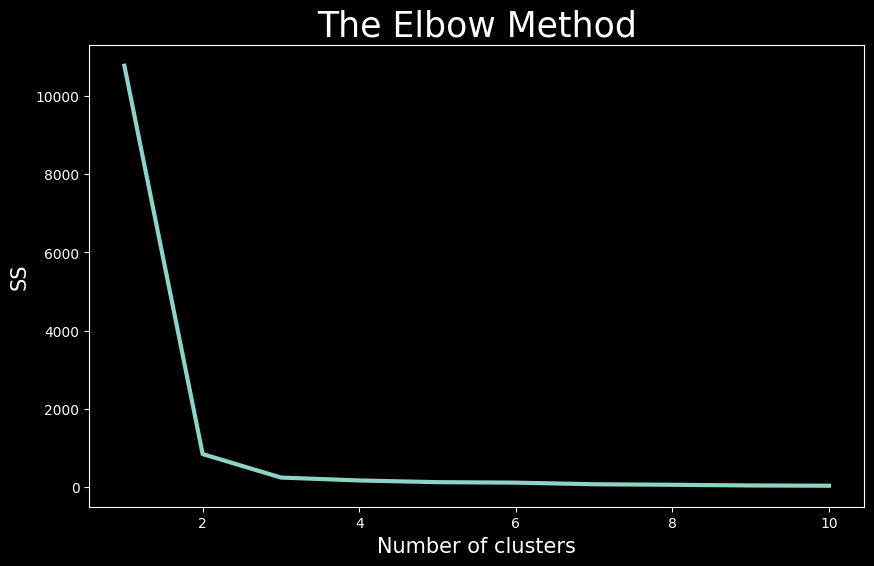

In [11]:
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(X)
    ss.append(kmeans.inertia_) # kmeans.inertia_ will give us wcss value
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), ss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('SS', fontsize =15 )
plt.show()

## Applying KMeans

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [14]:
y_pred

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2,
       2, 2], dtype=int32)

In [15]:
centers = kmeans.cluster_centers_

## Visualize the clusters

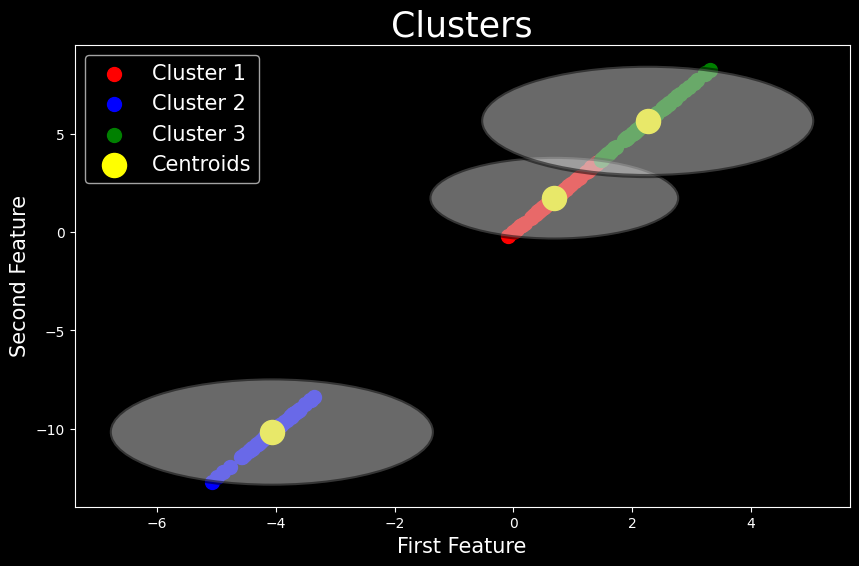

In [16]:
from scipy.spatial.distance import cdist
plt.figure(figsize = (10,6))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
radii = [cdist(X[y_pred == i], [center]).max()
for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
        ax = plt.gca()
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=3, alpha=0.5, zorder=1))
plt.title('Clusters', fontsize = 25)
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Applying Gaussian Mixture Model

In [17]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
y_pred_gmm = gmm.fit_predict(X)

In [18]:
y_pred_gmm

array([2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2,
       0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1,
       2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0,
       1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0,
       2, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2,
       1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2,
       2, 2])

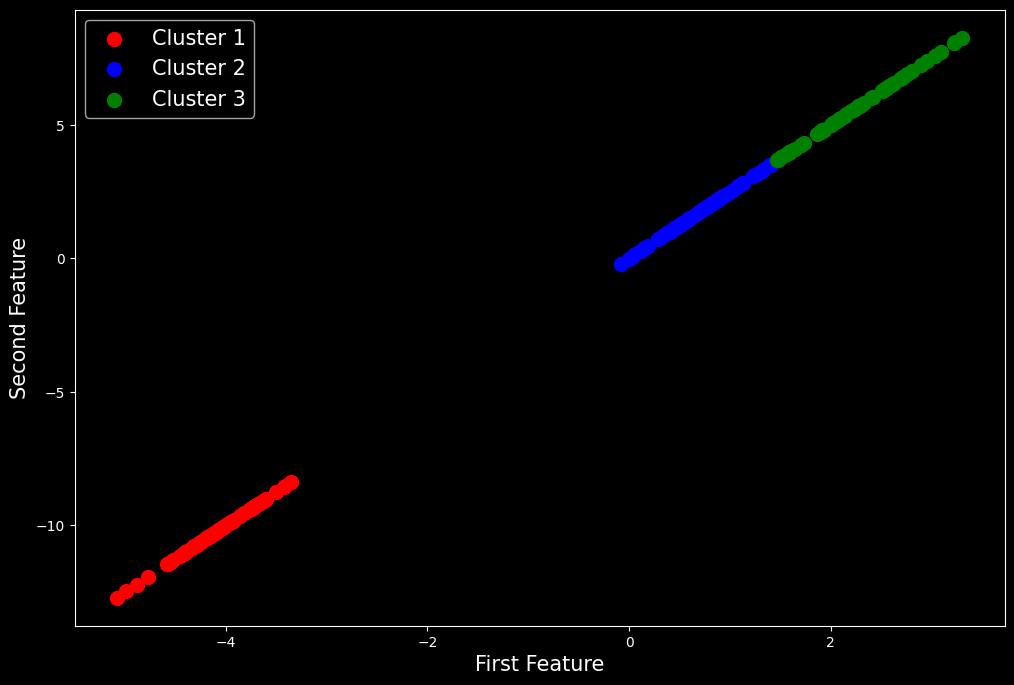

In [19]:
plt.figure(figsize = (12,8))
plt.scatter(X[y_pred_gmm == 0, 0], X[y_pred_gmm == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred_gmm == 1, 0], X[y_pred_gmm == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred_gmm == 2, 0], X[y_pred_gmm == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [20]:
prob = gmm.predict_proba(X).round(3)

In [21]:
prob

array([[0.   , 0.   , 1.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.993, 0.007],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.028, 0.972],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.005, 0.995],
       [0.   , 0.434, 0.566],
       [1.   , 0.   , 0.   ],
       [0.   , 0.974, 0.026],
       [1.   , 0.   , 0.   ],
       [0.   , 0.001, 0.999],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.016, 0.984],
       [1.   , 0.   , 0.   ],
       [0.   , 0.999, 0.001],
       [1.   , 0.   , 0.   ],
       [0.   , 0.997, 0.003],
       [0.   , 0.999, 0.001],
       [1.   , 0.   , 0.   ],
       [0.   , 0.999, 0.001],
       [0.   , 0.407, 0.593],
       [0.   , 0.305, 0.695],
       [0.   , 0.   , 1.   ],
       [1.   , 0.   , 0.   ],
       [1.

In [ ]:
prob.shape

In [22]:
idx = np.where(prob == 0.446 )[0]

In [23]:
XP = X[idx]

In [24]:
XP

array([[1.47201214, 3.68003035]])

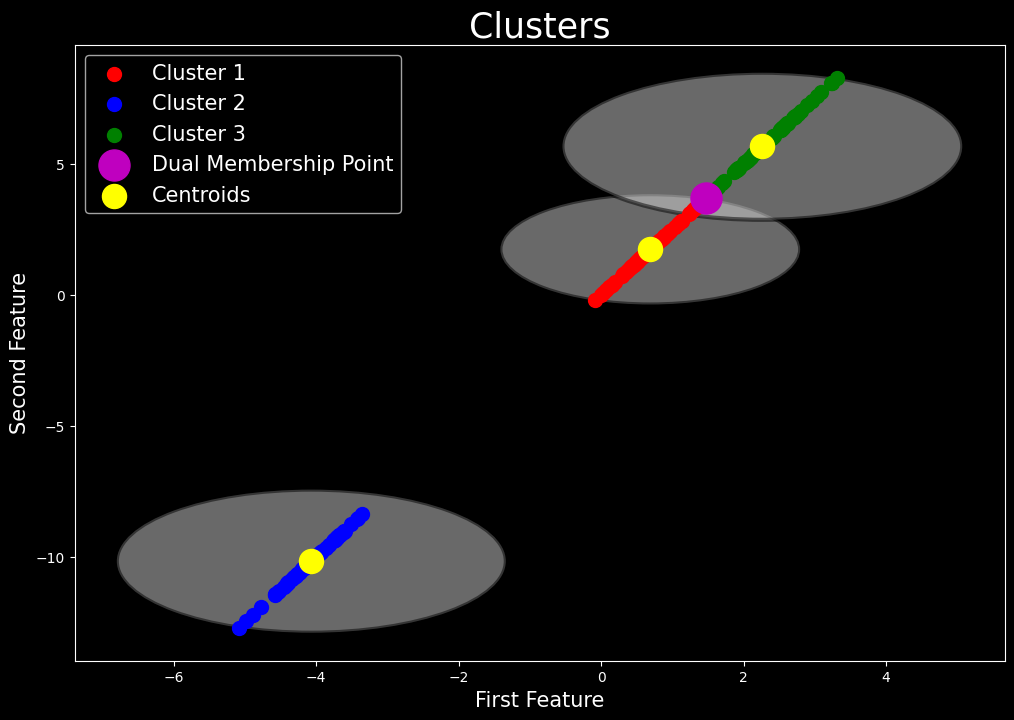

In [25]:
from scipy.spatial.distance import cdist
plt.figure(figsize = (12,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(XP[:,0], XP[:,1], s= 500, c= 'm', label = 'Dual Membership Point')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
radii = [cdist(X[y_pred == i], [center]).max()
for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
        ax = plt.gca()
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=3, alpha=0.5, zorder=0))
plt.title('Clusters', fontsize = 25)
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()